# HOLIDAY EPISODES ANALYSIS 🎅

In [4]:
import polars as pl
import seaborn as sns

sns.set_style("whitegrid")

episodes = pl.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-12-19/holiday_episodes.csv', ignore_errors=True)

### The volume of holiday episodes has been increasing over the years, most notably in the last decade.

Text(0, 0.5, 'Number of Episodes')

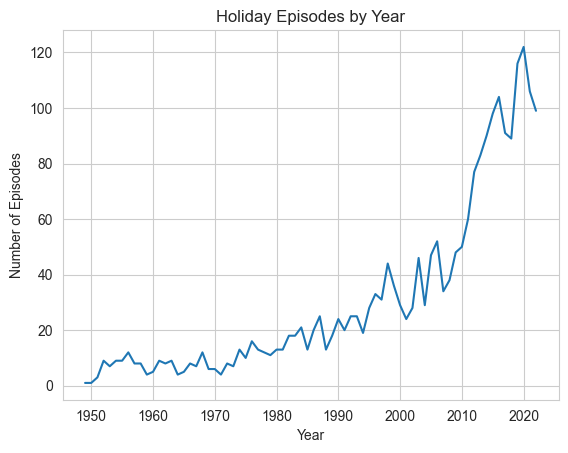

In [11]:
episodes_by_year = episodes.filter(pl.col('year') <= 2022).group_by(pl.col('year')).count().sort(pl.col('year'))

plt = sns.lineplot(data=episodes_by_year, x='year', y='count')

plt.set_title('Holiday Episodes by Year')
plt.set_xlabel('Year')
plt.set_ylabel('Number of Episodes')

### In spite of this increase, the average ratings of holiday episodes has remained mainly static over the years but there has been a lot more variability, especially in the two decades.

Text(0, 0.5, 'Average Rating')

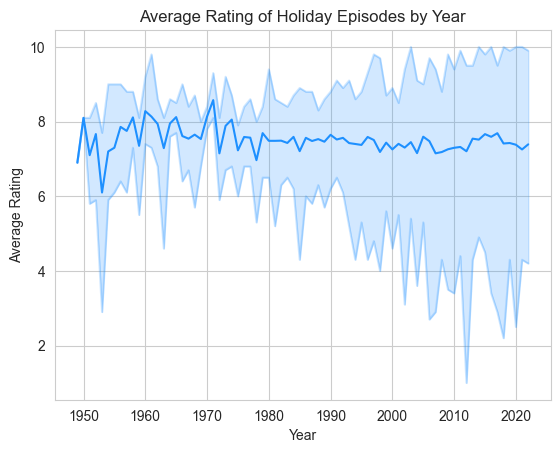

In [36]:
rating_by_year = episodes.filter(pl.col('year') <= 2022).group_by(pl.col('year')).agg(pl.col('average_rating').mean().alias('avg_rating'),
                                                                     pl.col('average_rating').std().alias('std_rating'),
                                                                     pl.col('average_rating').min().alias('min_rating'),
                                                                     pl.col('average_rating').max().alias('max_rating'),
                                                                     ).sort(pl.col('year'))


plt = sns.lineplot(data=rating_by_year, x='year', y='avg_rating', color='dodgerblue')
plt = sns.lineplot(data=rating_by_year, x='year', y='max_rating', color='dodgerblue', alpha=0.2)
plt = sns.lineplot(data=rating_by_year, x='year', y='min_rating', color='dodgerblue', alpha=0.2)
plt.fill_between(rating_by_year['year'], rating_by_year['min_rating'], rating_by_year['max_rating'], color='dodgerblue', alpha=0.2)


plt.set_title('Average Rating of Holiday Episodes by Year') 
plt.set_xlabel('Year')
plt.set_ylabel('Average Rating')

In [37]:
# do christmas episodes have a higher rating than other holiday episodes?
# do christmas episodes have a higher rating than other episodes in the same season?
# what genres are most common in holiday episodes?
# what genera has the highest average rating?
# are christmas episodes getting longer?



tconst,parent_tconst,season_number,episode_number,primary_title,original_title,year,runtime_minutes,genres,simple_title,average_rating,num_votes,parent_title_type,parent_primary_title,parent_original_title,parent_start_year,parent_end_year,parent_runtime_minutes,parent_genres,parent_simple_title,parent_average_rating,parent_num_votes,christmas,hanukkah,kwanzaa,holiday
str,str,str,str,str,str,i64,str,str,str,f64,i64,str,str,str,i64,str,str,str,str,f64,i64,bool,bool,bool,bool
"""tt0046855""","""tt0046643""","""1""","""4""","""A Christmas Ca…","""A Christmas Ca…",1954,"""60""","""Adventure,Dram…","""a christmas ca…",5.9,159,"""tvSeries""","""Shower of Star…","""Shower of Star…",1954,"""1958""","""60""","""Adventure,Dram…","""shower of star…",7.5,78,true,false,false,false
"""tt0110014""","""tt0094525""","""6""","""1""","""Hercule Poirot…","""Hercule Poirot…",1994,"""100""","""Crime,Drama,My…","""hercule poirot…",8.0,2461,"""tvSeries""","""Poirot""","""Poirot""",1989,"""2013""","""100""","""Crime,Drama,My…","""poirot""",8.6,50365,true,false,false,false
"""tt0125755""","""tt2388808""","""NA""","""NA""","""Red Skelton's …","""Red Skelton's …",1981,"""50""","""Music""","""red skeltons c…",8.1,167,"""tvSeries""","""Standing Room …","""Standing Room …",1976,"""1982""","""NA""","""Music""","""standing room …",7.7,41,true,false,false,false
"""tt0138038""","""tt0132666""","""1""","""14""","""Principal Take…","""Principal Take…",1998,"""96""","""Adventure,Come…","""principal take…",6.0,414,"""tvSeries""","""The Wonderful …","""The Wonderful …",1997,"""2023""","""120""","""Adventure,Come…","""the wonderful …",7.4,1005,false,false,false,true
"""tt0179551""","""tt0233023""","""1""","""14""","""A Christmas Me…","""A Christmas Me…",1966,"""51""","""Comedy,Drama,M…","""a christmas me…",9.0,257,"""tvSeries""","""ABC Stage 67""","""ABC Stage 67""",1966,"""1967""","""51""","""Comedy,Drama,M…","""abc stage 67""",7.4,104,true,false,false,false
"""tt0219585""","""tt1043408""","""1""","""9""","""Charlie's Chri…","""Charlie's Chri…",1984,"""NA""","""Drama,Family""","""charlies chris…",6.8,37,"""tvSeries""","""Young People's…","""Young People's…",1984,"""NA""","""NA""","""Drama,Family""","""young peoples …",6.2,16,true,false,false,false
"""tt0266854""","""tt0112123""","""1""","""8""","""A Pinky & the …","""A Pinky & the …",1995,"""30""","""Adventure,Anim…","""a pinky the b…",8.5,431,"""tvSeries""","""Pinky and the …","""Pinky and the …",1995,"""1998""","""30""","""Adventure,Anim…","""pinky and the …",7.8,32238,true,false,false,false
"""tt0272826""","""tt22506502""","""NA""","""NA""","""Saturday Night…","""Saturday Night…",1999,"""65""","""Talk-Show""","""saturday night…",7.2,360,"""tvSeries""","""Saturday Night…","""Saturday Night…",1999,"""NA""","""NA""","""Talk-Show""","""saturday night…",7.7,25,true,false,false,false
"""tt0272861""","""tt0136671""","""NA""","""NA""","""The Stableboy'…","""The Stableboy'…",1978,"""27""","""Drama,Family""","""the stableboys…",6.6,13,"""tvSeries""","""This Is the Li…","""The Fisher Fam…",1952,"""1988""","""30""","""Drama,Family""","""this is the li…",7.0,77,true,false,false,false


<Axes: xlabel='year', ylabel='avg_runtime'>

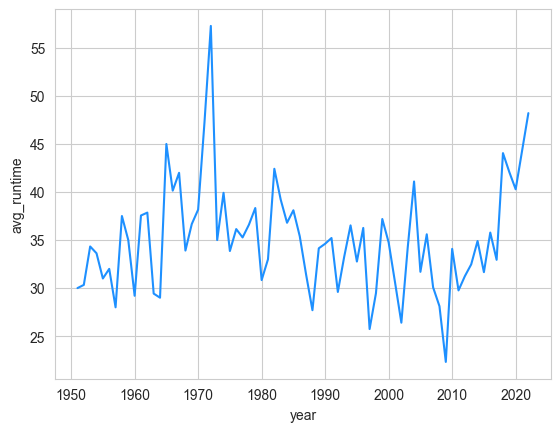

In [45]:
episode_length = episodes.select(pl.col('year'), pl.col('runtime_minutes').cast(pl.Int64, strict=False).alias('runtime')).filter((pl.col('year') <= 2022) & (pl.col('runtime').is_not_null())).group_by(pl.col('year')).agg(pl.col('runtime').mean().alias('avg_runtime'),
                                                                                                                                                                                                                                                                                                 pl.col('average_rating').std().alias('std_rating'),
                                                                     pl.col('average_rating').min().alias('min_rating'),
                                                                     pl.col('average_rating').max().alias('max_rating'),)


sns.lineplot(data=episode_length, x='year', y='avg_runtime', color='dodgerblue')

In [41]:
episodes

tconst,parent_tconst,season_number,episode_number,primary_title,original_title,year,runtime_minutes,genres,simple_title,average_rating,num_votes,parent_title_type,parent_primary_title,parent_original_title,parent_start_year,parent_end_year,parent_runtime_minutes,parent_genres,parent_simple_title,parent_average_rating,parent_num_votes,christmas,hanukkah,kwanzaa,holiday
str,str,str,str,str,str,i64,str,str,str,f64,i64,str,str,str,i64,str,str,str,str,f64,i64,bool,bool,bool,bool
"""tt0046855""","""tt0046643""","""1""","""4""","""A Christmas Ca…","""A Christmas Ca…",1954,"""60""","""Adventure,Dram…","""a christmas ca…",5.9,159,"""tvSeries""","""Shower of Star…","""Shower of Star…",1954,"""1958""","""60""","""Adventure,Dram…","""shower of star…",7.5,78,true,false,false,false
"""tt0110014""","""tt0094525""","""6""","""1""","""Hercule Poirot…","""Hercule Poirot…",1994,"""100""","""Crime,Drama,My…","""hercule poirot…",8.0,2461,"""tvSeries""","""Poirot""","""Poirot""",1989,"""2013""","""100""","""Crime,Drama,My…","""poirot""",8.6,50365,true,false,false,false
"""tt0125755""","""tt2388808""","""NA""","""NA""","""Red Skelton's …","""Red Skelton's …",1981,"""50""","""Music""","""red skeltons c…",8.1,167,"""tvSeries""","""Standing Room …","""Standing Room …",1976,"""1982""","""NA""","""Music""","""standing room …",7.7,41,true,false,false,false
"""tt0138038""","""tt0132666""","""1""","""14""","""Principal Take…","""Principal Take…",1998,"""96""","""Adventure,Come…","""principal take…",6.0,414,"""tvSeries""","""The Wonderful …","""The Wonderful …",1997,"""2023""","""120""","""Adventure,Come…","""the wonderful …",7.4,1005,false,false,false,true
"""tt0179551""","""tt0233023""","""1""","""14""","""A Christmas Me…","""A Christmas Me…",1966,"""51""","""Comedy,Drama,M…","""a christmas me…",9.0,257,"""tvSeries""","""ABC Stage 67""","""ABC Stage 67""",1966,"""1967""","""51""","""Comedy,Drama,M…","""abc stage 67""",7.4,104,true,false,false,false
"""tt0219585""","""tt1043408""","""1""","""9""","""Charlie's Chri…","""Charlie's Chri…",1984,"""NA""","""Drama,Family""","""charlies chris…",6.8,37,"""tvSeries""","""Young People's…","""Young People's…",1984,"""NA""","""NA""","""Drama,Family""","""young peoples …",6.2,16,true,false,false,false
"""tt0266854""","""tt0112123""","""1""","""8""","""A Pinky & the …","""A Pinky & the …",1995,"""30""","""Adventure,Anim…","""a pinky the b…",8.5,431,"""tvSeries""","""Pinky and the …","""Pinky and the …",1995,"""1998""","""30""","""Adventure,Anim…","""pinky and the …",7.8,32238,true,false,false,false
"""tt0272826""","""tt22506502""","""NA""","""NA""","""Saturday Night…","""Saturday Night…",1999,"""65""","""Talk-Show""","""saturday night…",7.2,360,"""tvSeries""","""Saturday Night…","""Saturday Night…",1999,"""NA""","""NA""","""Talk-Show""","""saturday night…",7.7,25,true,false,false,false
"""tt0272861""","""tt0136671""","""NA""","""NA""","""The Stableboy'…","""The Stableboy'…",1978,"""27""","""Drama,Family""","""the stableboys…",6.6,13,"""tvSeries""","""This Is the Li…","""The Fisher Fam…",1952,"""1988""","""30""","""Drama,Family""","""this is the li…",7.0,77,true,false,false,false
